# Assignment 2.2: Convolutional Neural Network
Student Name 1: Rodrigo Pueblas

Student Name 2: Cristian Abrante

Student Name 3: Carlos Sánchez

## German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [0]:
!wget http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip

--2020-03-08 10:45:28--  http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
Resolving www.dia.fi.upm.es (www.dia.fi.upm.es)... 138.100.11.29
Connecting to www.dia.fi.upm.es (www.dia.fi.upm.es)|138.100.11.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G  11.2MB/s    in 2m 22s  

2020-03-08 10:47:51 (11.2 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]

Archive:  FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  infla

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

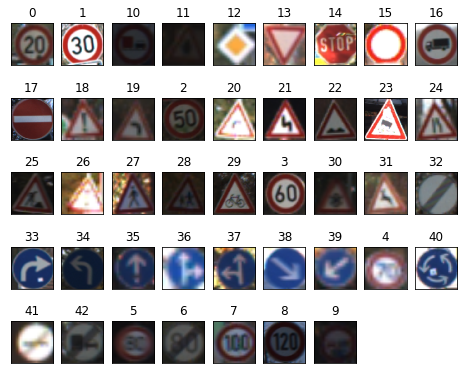

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

input_shape = (SIGN_SIZE[0], SIGN_SIZE[1], 3)

cnn = Sequential()

cnn.add(Conv2D(64, 11, strides=4, padding='valid', input_shape=input_shape))
cnn.add(LeakyReLU())
cnn.add(MaxPooling2D(pool_size=(3, 3), strides=2))
cnn.add(Conv2D(192, 5, padding='same'))
cnn.add(LeakyReLU())
cnn.add(MaxPooling2D(pool_size=(3, 3), strides=2))

cnn.add(Conv2D(512, 3, padding='same'))
cnn.add(LeakyReLU())
cnn.add(Conv2D(256, 3, padding='same'))
cnn.add(LeakyReLU())
cnn.add(MaxPooling2D(pool_size=(3, 3), strides=2))

cnn.add(Flatten())
cnn.add(Dense(1028))
cnn.add(LeakyReLU())
cnn.add(Dropout(0.5))
cnn.add(Dense(1028))
cnn.add(LeakyReLU())
cnn.add(Dropout(0.5))

cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.000001, decay=0.0, amsgrad=False)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 64)        23296     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 54, 54, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 192)       307392    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 26, 26, 192)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 192)       0        

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False, 
                            featurewise_std_normalization=False, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.,)

In [8]:
from time import time

it = datagen.flow(tr_signs, tr_labels)

history = cnn.fit_generator(it, steps_per_epoch=100, epochs=20, validation_data=(va_signs, va_labels), verbose=2, shuffle=True)

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=1)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 30s - loss: 3.3687 - acc: 0.1230 - val_loss: 2.7209 - val_acc: 0.2857
Epoch 2/20
 - 28s - loss: 2.6749 - acc: 0.2843 - val_loss: 2.0369 - val_acc: 0.4405
Epoch 3/20
 - 28s - loss: 1.9858 - acc: 0.4223 - val_loss: 1.5616 - val_acc: 0.5516
Epoch 4/20
 - 28s - loss: 1.5615 - acc: 0.5184 - val_loss: 1.2874 - val_acc: 0.6111
Epoch 5/20
 - 29s - loss: 1.2375 - acc: 0.6227 - val_loss: 0.9851 - val_acc: 0.7024
Epoch 6/20
 - 28s - loss: 0.9242 - acc: 0.7083 - val_loss: 0.7509 - val_acc: 0.7897
Epoch 7/20
 - 28s - loss: 0.7781 - acc: 0.7439 - val_loss: 0.6403 - val_acc: 0.8333
Epoch 8/20
 - 28s - loss: 0.5846 - acc: 0.8177 - val_loss: 0.6150 - val_acc: 0.8611
Epoch 9/20
 - 28s - loss: 0.4842 - acc: 0.8507 - val_loss: 0.4410 - val_acc: 0.8810
Epoch 10/20
 - 28s - loss: 0.4045 - acc: 0.8718 - val_loss: 0.4212 - val_acc: 0.8810
Epoch 11/20
 - 28s - loss: 0.3209 - acc: 0.9016 - val_los

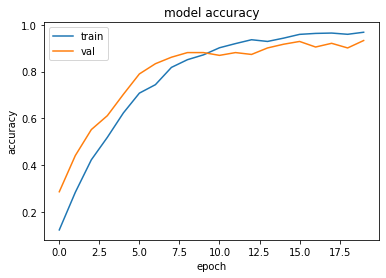

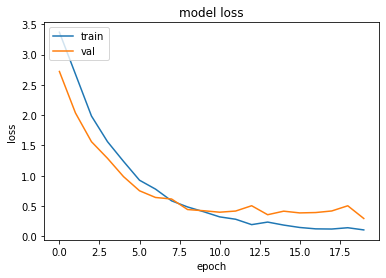

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# CIFAR 100 Dataset

In [0]:
from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 2s 0us/step


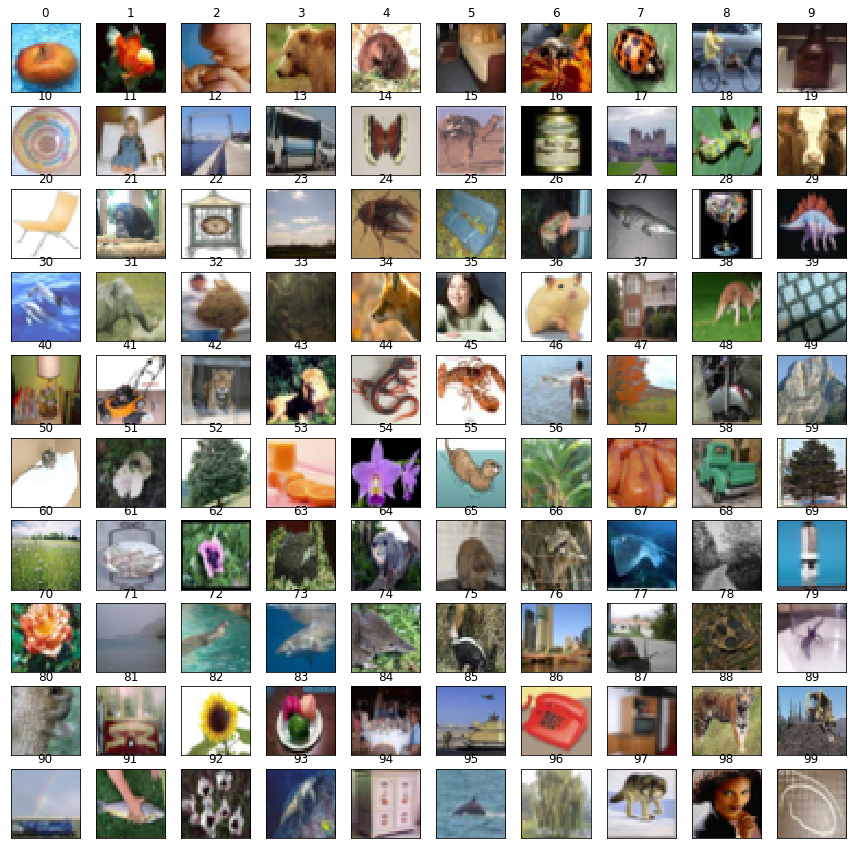

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [0]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
import keras

input_shape = (CIFAR_SIZE[0], CIFAR_SIZE[1], 3)

cnn = Sequential()

cnn.add(Conv2D(32, 3, 3, border_mode='same',
                        input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, 3, 3))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, 3, 3, border_mode='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, 3, 3))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.000001, decay=0.0, amsgrad=False)
cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [0]:
data = cnn.fit(x_train, tr_labels, batch_size=16, epochs=20, verbose=2, validation_data=(x_val, va_labels))

start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 235s - loss: 4.2804 - acc: 0.0490 - val_loss: 3.8324 - val_acc: 0.1321
Epoch 2/20
 - 233s - loss: 3.7642 - acc: 0.1244 - val_loss: 3.4809 - val_acc: 0.1876
Epoch 3/20
 - 244s - loss: 3.4975 - acc: 0.1721 - val_loss: 3.2366 - val_acc: 0.2273
Epoch 4/20
 - 249s - loss: 3.3072 - acc: 0.2056 - val_loss: 3.1020 - val_acc: 0.2500
Epoch 5/20
 - 244s - loss: 3.1614 - acc: 0.2325 - val_loss: 2.9750 - val_acc: 0.2769
Epoch 6/20
 - 239s - loss: 3.0496 - acc: 0.2507 - val_loss: 2.8885 - val_acc: 0.2890
Epoch 7/20
 - 248s - loss: 2.9417 - acc: 0.2741 - val_loss: 2.8213 - val_acc: 0.3021
Epoch 8/20
 - 239s - loss: 2.8484 - acc: 0.2937 - val_loss: 2.7560 - val_acc: 0.3228
Epoch 9/20
 - 235s - loss: 2.7617 - acc: 0.3111 - val_loss: 2.6674 - val_acc: 0.3391
Epoch 10/20
 - 234s - loss: 2.6856 - acc: 0.3244 - val_loss: 2.6243 - val_acc: 0.3482
Epoch 11/20
 - 235s - loss: 2.6110 - acc: 0.3376 - val_loss: 2.5849 - val_acc: 0.3493
Epoch 12/20
 

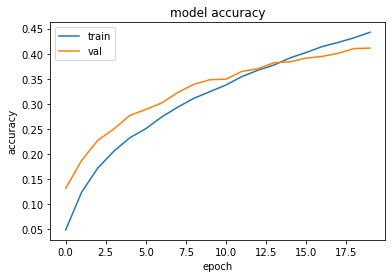

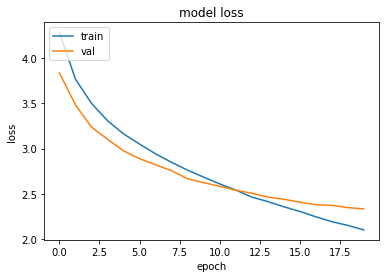

In [0]:
# summarize history for accuracy
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()